In [2]:
import numpy as np
import matplotlib.pyplot as plt
import random
import time
from datetime import datetime
from numba import jit
from numba import njit

In [66]:
def function_of_z(z, b):
    return ((z**2 + 1)/(2*z))**b

In [67]:
def check_for_divergence(z):
    z_array = np.zeros(30, dtype=complex)
    z_array[0] = z
    
    for i in range(1, len(z_array)):
        z_array[i] = function_of_z(z_array[i-1], 2)
        if np.isnan(z_array[i]):
            break
    
    if any(np.isnan(z_array)):
        return 0, 0
    epsilon = 10**-100
    if abs(z_array[-1].real - 1) < epsilon or abs(z_array[-1].imag - 1) < epsilon:
        return 1, z
    else:
        return 2, z

In [73]:
start = time.time()
random.seed(datetime.now().timestamp())
random_array = np.zeros(10**7, dtype=complex)
x, y = 0, 0
for i in range(0, 10**7):
    x = random.uniform(-4, 4)
    y = random.uniform(-8, 8)
    random_array[i] = complex(x, y)
end = time.time()
print(end-start)

10.617238998413086


In [69]:
start = time.time()

check_list = []
check_list_flow = []

for i in range(0, 10**6):
    check_num, z = check_for_divergence(random_array[i])
    if check_num == 1 and check_num != 0:
        check_list.append(random_array[i])
    elif check_num == 2 and check_num != 0:
        check_list_flow.append(random_array[i])
        
    
    '''if check_for_divergence(random_array[i])[0] == 1:
        check_list.append(random_array[i])'''

end=time.time()
print(end-start)

check_array = np.array(check_list)
check_array_flow = np.array(check_list_flow)

C:\Users\Ayush urule\AppData\Local\Temp\ipykernel_14816\1992318710.py:2: RuntimeWarning: overflow encountered in scalar power
  return ((z**2 + 1)/(2*z))**b
C:\Users\Ayush urule\AppData\Local\Temp\ipykernel_14816\1992318710.py:2: RuntimeWarning: invalid value encountered in scalar power
  return ((z**2 + 1)/(2*z))**b
C:\Users\Ayush urule\AppData\Local\Temp\ipykernel_14816\1992318710.py:2: RuntimeWarning: invalid value encountered in scalar divide
  return ((z**2 + 1)/(2*z))**b
C:\Users\Ayush urule\AppData\Local\Temp\ipykernel_14816\1992318710.py:2: RuntimeWarning: overflow encountered in scalar divide
  return ((z**2 + 1)/(2*z))**b
C:\Users\Ayush urule\AppData\Local\Temp\ipykernel_14816\1992318710.py:2: RuntimeWarning: invalid value encountered in scalar multiply
  return ((z**2 + 1)/(2*z))**b


33.28705859184265


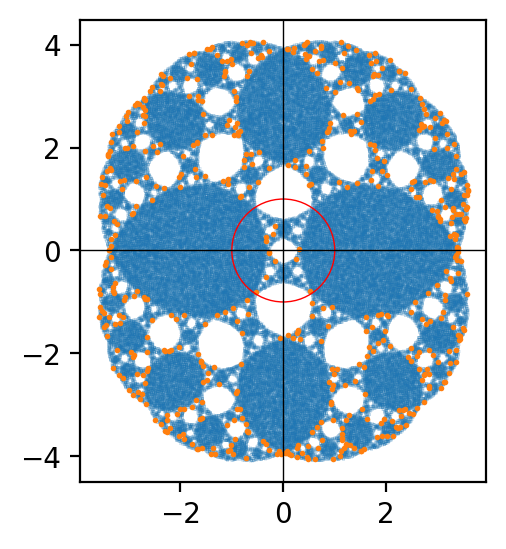

In [71]:
plt.figure(figsize=(3, 3), dpi=200)
plt.scatter(check_array.real, check_array.imag, s=0.001, label = 'kuch bhi')
plt.scatter(check_array_flow.real, check_array_flow.imag, s = 1, label = 'fixed points')
plt.gca().set_aspect('equal')
circle1 = plt.Circle((0, 0), 1, color='r', fill=False, lw=0.5)

plt.gca().add_patch(circle1)
plt.axvline(0, color='k', lw = 0.5)
plt.axhline(0, color='k', lw = 0.5)

# Rewriting code for using numba

In [3]:
# The first step is to generate an array of random numbers
@njit
def generate_random_of_length(length):
    
    random_array = np.zeros(length, dtype=np.complex128)
    
    x, y = 0, 0
    
    for i in range(0, length):
        x = random.uniform(-4, 4)
        y = random.uniform(-8, 8)
        random_array[i] = complex(x, y)
    
    return random_array

In [23]:
start = time.time()
random_array = generate_random_of_length(10**8)
end = time.time()
print(end-start)

4.84774112701416


In [5]:
# Defining the complex function
@njit
def function_of_z(z, b):
    result = ((z**2 + 1)/(2*z))**b
    return result

In [24]:
@njit
def check_for_divergence(z):
    z_array = np.zeros(30, dtype=np.complex128)
    z_array[0] = z
    
    for i in range(1, len(z_array)):
        z_array[i] = function_of_z(z_array[i-1], 2)
        if np.isnan(z_array[i]):
            break
    
    for j in range(0, len(z_array)):
        if np.isnan(z_array[j]):
            return 0, 0
    
    epsilon = 10**-100
    
    if abs(z_array[-1].real - 1) < epsilon or abs(z_array[-1].imag - 1) < epsilon:
        return 1, z
    else:
        return 2, z

In [36]:
@njit

def final_array_gen(random_arr):
    boundary_points = np.zeros(10**8, dtype=np.complex128)
    converging_points = np.zeros(10**8, dtype=np.complex128)
    
    for i in range(0, len(random_arr)):
        check, z = check_for_divergence(random_arr[i])
        if check == 1:
            converging_points[i] = random_arr[i]
        elif check == 2:
            boundary_points[i] = random_arr[i]
    
    return boundary_points, converging_points

In [37]:
run_1_bp, run_1_cp = final_array_gen(random_array)

In [ ]:
plt.figure(figsize=(3, 3), dpi=200)

plt.scatter(run_1_bp.real, run_1_bp.imag, s=0.01)
plt.scatter(run_1_cp.real, run_1_cp.imag, s=0.01, alpha=0.1)


plt.gca().set_aspect('equal')
circle1 = plt.Circle((0, 0), 1, color='r', fill=False, lw=0.5)

plt.gca().add_patch(circle1)
plt.axvline(0, color='k', lw = 0.5)
plt.axhline(0, color='k', lw = 0.5)